# 1、虚拟机错误：获取该虚拟机的所有权失败。主机上的某个应用程序正在使用该虚拟机。
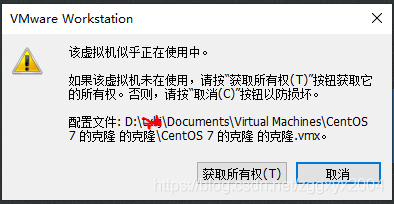
**【解决方法】**
> **删除虚拟机配置文件存放地的 .ick文件后重新打开虚拟机**

# 2、catkin_make时报错’Invoking "make -j8 -l8" failed‘
**【解决方法】**
> 1. **rm -rf build devel**
> 2. **catkin_make**

# 3、调用tf_conversions模块将欧拉角转换成四元数时报错"ImportError: dynamic module does not define module export function (PyInit_PyKDL)"
> **原因是：ros默认将PyKDL安装在python2.7里，而程序的编译器为python3.6，因此导致不能编译**
> **解决方法，重新编译PyKDl，并且将PyKDL给入到conda虚拟环境内**
**详见：https://blog.csdn.net/qq_42237662/article/details/109783935**
![image-7.png](attachment:image-7.png)
> **【问题2】：当上述操作都执行完后，在python中import PyKDL时报错“ImportError: \/home\/greenddb99\/miniconda3\/envs\/myenv1\/lib\/python3.6\/site-packages\/PyKDL.cpython-36m-x86_64-linux-gnu.so: undefined symbol _ZN3KDL4TreeC1ERKSs“**
> **原因是：在conda环境的dist-packages路径上有另一个 .so文件与我移入的文件冲突，将去删去即可**
>**【大坑2：关键要看报错时文件运行到哪里出现找不到PyKDl错误，之后将 .so文件赋值到该路径！！！】

# 4、rosdep init 与 rosdep update错误
**1. 使用更改ip节点：https://www.cnblogs.com/mengydz/p/12890845.html**
**2. 用更换下载源：https://blog.csdn.net/Merokes/article/details/121364590**
**下载源：https://gitee.com/zhao-xuzuo/rosdistro/tree/master**
**【注意更改rosdep/sources.list.d/20-default.list内的下载源地址】**

# 5、catkin_make时出现错误：c++: internal compiler error: 已杀死 (program cc1plus)
**【原因：交换空间，内存不足】**
**【解决方法：释放空间 sudo swapoff -a】**https://www.jianshu.com/p/c4ef42f6b2ec

# 6、因为误操作导致工作空间cmake文件或者什么配置文件损坏的急救技巧
> **1. 将原来的工作空间 myros 在 Documen 保存起来**
> **2. 在~下重新创建一个工作空间 2_myros ，并且成功catkin_make （此时可以指定-DPYTHON_EXECUTABLE=你的conda的环境的python地址）**
> **3. 将 myros 的 src 文件内容全部移植到 2_myros 下，并且将 2_myros 更名为 myros**
> **4. 用vscode的替换功能，将build文件中的所有 2_myros 的路径替换成 myros**
> **5. 在工作空间下 catkin_make**

# 7、调用tf2_ros时报错"ImportError: dynamic module does not define module export function (PyInit_tf2)"
**【原因：python2与python3的冲突】**
**【解决方法：ros配置成python3：】**https://answers.ros.org/question/326226/importerror-dynamic-module-does-not-define-module-export-function-pyinit__tf2/
https://blog.csdn.net/weixin_44075048/article/details/113485399
**注意！！！：当配置catkin_make时要将自己的路径改为自己用的python3的地址**
（我应用自己conda环境内的python3）

In [ ]:

catkin_make --cmake-args \
            -DCMAKE_BUILD_TYPE=Release \
            -DPYTHON_EXECUTABLE=/home/greenddb99/miniconda3/envs/myenv1/bin/python\
            -DPYTHON_INCLUDE_DIR=/home/greenddb99/miniconda3/envs/myenv1/include/python3.6m\
            -DPYTHON_LIBRARY=/home/greenddb99/miniconda3/envs/myenv1/lib/libpython3.6m.so

# 5、在运行 tf2_tools 中的将坐标关系生成pdf文件的模块 view.frames.py 时，报错：  
**【File "/home/greenddb99/myros/src/geometry2/tf2_tools/scripts/view_frames.py", line 51, in main
    data = yaml.load(srv().frame_yaml)
TypeError: load() missing 1 required positional argument: 'Loader'】**

**【原因：YAML 5.1版本后弃用了yaml.load(file)这个用法，因为觉得很不安全，5.1版本之后就修改了需要指定Loader】**

**【解决方法：打开 view_frames.py文件，在报错处 yaml.load()内增加 Loader=yaml.FullLoader】**
https://blog.csdn.net/qq_34495095/article/details/120905179
https://blog.csdn.net/qq_33580192/article/details/121080535

# 6、书写lanuch文件时报错：RLException: Invalid roslaunch XML syntax: not well-formed (invalid token): line 5, column 113
**【原因：在结束斜杠后加了空格导致程序格式错误< /空格>】**
**【解决方法：删掉空格】**

# 7、ubuntu死机解决方法
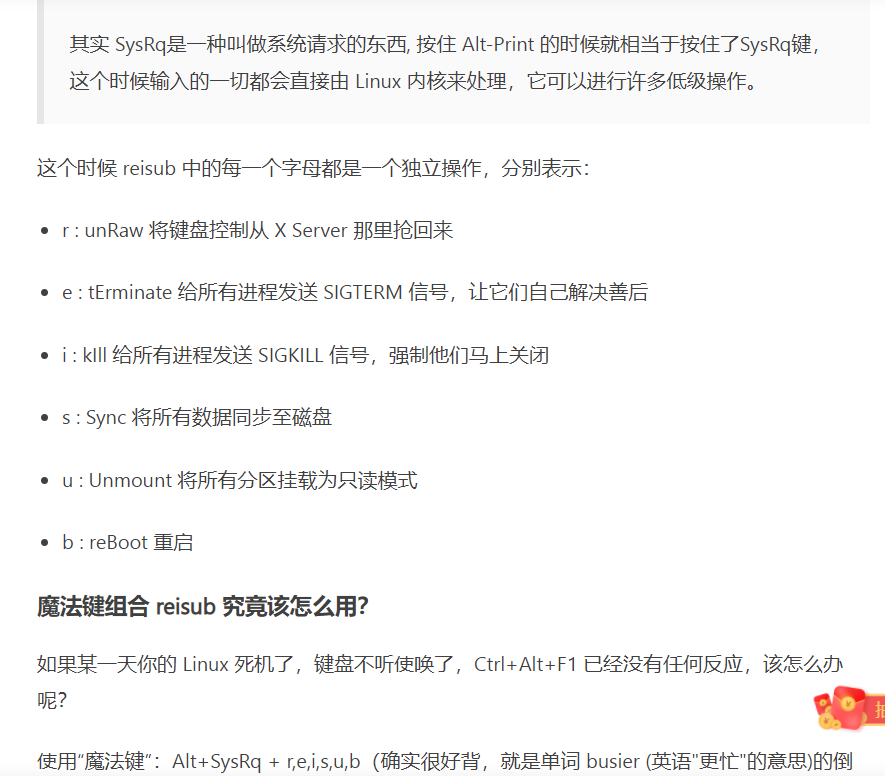

# 8、gazebo启动出错
**【解决方法】**
### 问题1:VMware: vmw_ioctl_command error Invalid argument(无效的参数)

**【解决:】**

**echo "export SVGA_VGPU10=0" >> ~/.bashrc**

**source .bashrc**

### 问题2:[Err] [REST.cc:205] Error in REST request

**【解决:】**
**sudo gedit ~/.ignition/fuel/config.yaml**

**然后将url : https://api.ignitionfuel.org使用 # 注释**

**再添加url: https://api.ignitionrobotics.org**

### 问题3:启动时抛出异常:[gazebo-2] process has died [pid xxx, exit code 255, cmd.....

**【解决:】killall gzserver和killall gzclient**

# 9、Ubuntu查找文件
https://www.cnblogs.com/klausage/p/10879685.html#:~:text=%E5%9C%A8ubuntu%E4%B8%AD%E6%90%9C%E7%B4%A2%E6%96%87%E4%BB%B6%E6%88%96%E6%96%87%E4%BB%B6%E5%A4%B9%E7%9A%84%E6%96%B9%E6%B3%95.%201.%20whereis%2B%E6%96%87%E4%BB%B6%E5%90%8D.%20%E7%94%A8%E4%BA%8E%E7%A8%8B%E5%BA%8F%E5%90%8D%E7%9A%84%E6%90%9C%E7%B4%A2%EF%BC%8C%E6%90%9C%E7%B4%A2%E7%BB%93%E6%9E%9C%E5%8F%AA%E9%99%90%E4%BA%8E%E4%BA%8C%E8%BF%9B%E5%88%B6%E6%96%87%E4%BB%B6%EF%BC%88%E5%8F%82%E6%95%B0-b%EF%BC%89%E3%80%81man%E8%AF%B4%E6%98%8E%E6%96%87%E4%BB%B6%EF%BC%88%E5%8F%82%E6%95%B0-m%EF%BC%89%E5%92%8C%E6%BA%90%E4%BB%A3%E7%A0%81%E6%96%87%E4%BB%B6%EF%BC%88%E5%8F%82%E6%95%B0-s%EF%BC%89%EF%BC%8C%E5%A6%82%E6%9E%9C%E7%9C%81%E7%95%A5%E5%8F%82%E6%95%B0%EF%BC%8C%E5%88%99%E8%BF%94%E5%9B%9E%E6%89%80%E6%9C%89%E4%BF%A1%E6%81%AF%E3%80%82.%202.%20find%20%2F%20-name,%2B%E6%96%87%E4%BB%B6%E5%90%8D.%20find%E6%98%AF%E5%9C%A8%E6%8C%87%E5%AE%9A%E7%9A%84%E7%9B%AE%E5%BD%95%E4%B8%8B%E9%81%8D%E5%8E%86%E6%9F%A5%E6%89%BE%EF%BC%8C%E5%A6%82%E6%9E%9C%E7%9B%AE%E5%BD%95%E4%BD%BF%E7%94%A8%20%2F%20%E5%88%99%E8%A1%A8%E7%A4%BA%E5%9C%A8%E6%89%80%E6%9C%89%E7%9B%AE%E5%BD%95%E4%B8%8B%E6%9F%A5%E6%89%BE%EF%BC%8Cfind%E6%96%B9%E5%BC%8F%E6%9F%A5%E6%89%BE%E6%96%87%E4%BB%B6%E6%B6%88%E8%80%97%E8%B5%84%E6%BA%90%E6%AF%94%E8%BE%83%E5%A4%A7%EF%BC%8C%E9%80%9F%E5%BA%A6%E4%B9%9F%E6%85%A2%E4%B8%80%E7%82%B9%E3%80%82.%203.%20locate%2B%E6%96%87%E4%BB%B6%E5%90%8D.%20linux%20

# 10、catkin_make时出现“no module name em”
**【解决方法】**
sudo apt-get install python-empy
或
pip install empy
或
sudo apt-get python3-empy
选择主要看三中方式安装的位置和你使用和安装ros的位置是否匹配，因为我jetson nano上的pip安装位置就在conda bash下，所以直接使用pip

# 11、ROS修改(删除)工作空间
https://blog.csdn.net/yong15565566939/article/details/100058029

# 12、更改conda下pip默认安装路径
https://blog.csdn.net/tsq292978891/article/details/104655113

# 13、ubuntu更改默认python版本和来源
https://www.cnblogs.com/yifugui/p/8649864.html

# 14、catkin_make:command not found
https://blog.csdn.net/qq_39989653/article/details/79120941

# 15、更新pip3
https://blog.csdn.net/m0_38068876/article/details/108178388

# 16、Git修改全局变量
https://www.cnblogs.com/zqunor/p/9055262.html

# 17、win下写的python文件在ubuntu会报错，原因是换行符不同
https://blog.csdn.net/Will_Ye/article/details/120372356?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_title~default-0.pc_relevant_default&spm=1001.2101.3001.4242.1&utm_relevant_index=1

# 18、roscore时报错：

In [ ]:
Traceback (most recent call last):
  File "/opt/ros/melodic/bin/roscore", line 37, in <module>
    from roslaunch.nodeprocess import DEFAULT_TIMEOUT_SIGINT, DEFAULT_TIMEOUT_SIGTERM
  File "/opt/ros/melodic/lib/python2.7/dist-packages/roslaunch/__init__.py", line 52, in <module>
    from . import param_dump as roslaunch_param_dump
  File "/opt/ros/melodic/lib/python2.7/dist-packages/roslaunch/param_dump.py", line 40, in <module>
    import roslaunch.config
  File "/opt/ros/melodic/lib/python2.7/dist-packages/roslaunch/config.py", line 45, in <module>
    import rospkg.distro
  File "/usr/lib/python3/dist-packages/rospkg/distro.py", line 44, in <module>
    import yaml
  File "/usr/lib/python3/dist-packages/yaml/__init__.py", line 284
    class YAMLObject(metaclass=YAMLObjectMetaclass):
                              ^
SyntaxError: invalid syntax

## 原因：因为设置的pythonpath为python3的，这是roscore就会引用python3的yaml，而roscore的代码为python2书写，因此报错。
https://blog.csdn.net/handsome_for_kill/article/details/81947978
最好的解决方法，但是因为要重装所以自己没采用，因此转战修改程序：https://blog.csdn.net/bluewhalerobot/article/details/80952776
## 解决方法：
### 1.echo ＄PYTHONPATH 观察目前python路径是什么
### 2.通过修改 .bashrc 中的export PYTHONPATH=＄PYTHONPATH：路径，使/opt/ros/melodic/lib/python2.7/dist-packages 为路径中的第一位，这样才能运行roscore（此方法为永久修改，可能导致一些问题）
### 3.可以直接在命令行运行 export PYTHONPATH=＄PYTHONPATH：路径 （临时修改，只在该命令行生效）
https://blog.csdn.net/c20081052/article/details/79715132


# 19、apt update 没有公钥
https://blog.csdn.net/weixin_44172434/article/details/89160720?msclkid=888405bdce8311ec93c6ee2d9a5dd5ce

# Jetson NANO 的坑与填坑在Jetson NANO operating下